# Overfitting y Underfitting
El primer problema ocurre cuando el modelo se ajusta demasiado a los datos, también se conoce como **high variance** o "varianza alta".  
En cambio el **underfitting** o ajuste débil, también llamado **high bias** o "sesgo elevado", sucede cuando el modelo no se ajusta bien a los datos.  
Vimos ambas situaciones en el capítulo anterior.

![under_right_over](https://www.researchgate.net/profile/Aditya_Nori/publication/262173709/figure/fig4/AS:668433788174340@1536378442416/Regression-example-underfit-a-good-fit-b-overfit-c.ppm)

¿Recuerdas que una recta no bastaba? un polinomio de grado 2 fue ideal, y un polinomio de alto grado se ajustará demasiado a los datos por tener más curvas.

**Incluir más features** aumenta la complejidad del modelo, más parámetros que entrenar dejan mayor variabilidad para aprender, **tener pocos datos** no nos muestra el panorama general, y tener datos **poco variados** causa que el modelo aprenda poco, por esto es importante mezclar los datos y tener la mayor variedad posible. 

Como **underfit** es la situación opuesta, incluir más features puede resolverla.

Esto nos indica que hay una **compensación** entre **bias** y **varianza**, incrementar uno disminuye el otro.  
Un modelo con **alto bias** es más simple y realizará predicciones simples, como la **primera** gráfica.
Si es muy complejo tendrá **alta varianza** realizando predicciones más complejas que pueden ser muy variadas y erróneas como la **tercera** gráfica.

Por lo que debemos encontrar un **balance** entre ambos, no demasiado simple ni demasiado complejo para no perder el panorama general, como en la **segunda** gráfica.

# Previniendo el overfit
Disminuir las features o conseguir más datos no es lo único que ayuda, también podemos usar **regularization** o regularización, el nombre se debe a que regularemos los coeficientes para que no sean tan altos, reduciendo la varianza.

![regularization](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/354px-Regularization.svg.png)

Existen ~~dos~~ tres tipos de regularización: $L_1$ o Ridge, $L_2$ o Lasso, y Elastic net, la combinación de ambas.

## Ridge Regularization
Esta regularización minimiza los coeficientes acercándolos a cero, pero nunca llegan a cero.
Tenemos la regresión Lineal con esta regularización en el objeto `Ridge`, es idéntico a `LinearRegression` con la diferencia de que recibe el parámetro `alpha` que va de 0 a 1, mientras más alta sea, mayor será la regularización.

Seguiremos el mismo procedimiento que antes: cargar los datos, seleccionar features, dividir en train y test para finalmente entrenar dos modelos y comparar sus coeficientes.
Usaremos `train_test_split` de sklearn para dividir el dataset, por defecto también mezcla los datos :D sólo debemos indicar el tamaño ya sea de train o de test en un rango de 0 a 1 y retornará cuatro arrays en el formato `X_train, X_test, y_train, y_test`, es decir, las X's, las y's.

In [252]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# importamos también Ridge
from sklearn.linear_model import LinearRegression, Ridge

# para dividir el dataset
from sklearn.model_selection import train_test_split

np.random.seed(42)

X, y = load_boston(return_X_y=True)
X_selected = X[:, [5]]

# exageremos un poco el grado
poly = PolynomialFeatures(degree=4, include_bias=False)

# esta vez transformemos antes de dividir
X_selected = poly.fit_transform(X_selected)

# recuerda este orden, dividimos en 80-20
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

# tendremos 2 modelos
model = LinearRegression()
model_l2 = Ridge(alpha=0.5)

model.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

print(f"Coeficientes Linear {model.coef_}")
print(f"Coeficientes Ridge  {model_l2.coef_}")

Coeficientes Linear [ 692.26665341 -180.22214302   20.31219847   -0.83011615]
Coeficientes Ridge  [ -1.26939074 -11.30615137   2.36414697  -0.12741743]


Como ves, los coeficientes han sido reducidos, pero ninguno ha desaparecido.
Esto modifica al modelo de la siguiente manera:

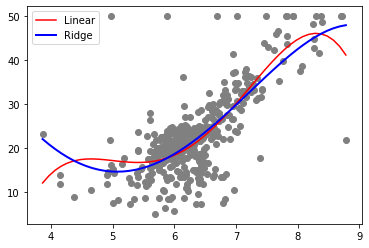

In [266]:
import matplotlib.pyplot as plt

xpoints = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 50)
xpoints_poly = poly.fit_transform(xpoints.reshape(-1, 1))

plt.scatter(X_train[:, 0], y_train, color="grey")
plt.plot(xpoints, model.predict(xpoints_poly), "r", label="Linear")
plt.plot(xpoints, model_l2.predict(xpoints_poly), color="b", linewidth="2", label="Ridge")
plt.legend(loc="best")

Como vez, la regularización ha restringido la curva, ya no se ajusta demasiado a los datos.
El parámetro `linewitdh` cambia el grosor, y `label` pone etiquetas a las gráficas, pero para mostrarlas debemos llamar a `plt.legend` el parámetro `loc` con el valor "best" tratará de determinar la mejor ubicación para las etiquetas.

## Lasso Regularization
El objeto `Lasso` es idéntico a `Ridge` con la diferencia de que **sí** reduce los coeficientes menos importantes a cero.

Coeficientes Linear [ 692.26665341 -180.22214302   20.31219847   -0.83011615]
Coeficientes Lasso  [-0.          0.          0.02042467  0.0058339 ]


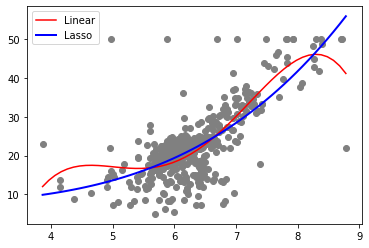

In [342]:
from sklearn.linear_model import Lasso

model_l1 = Lasso(alpha=1)
model_l1.fit(X_train, y_train)

print(f"Coeficientes Linear {model.coef_}")
print(f"Coeficientes Lasso  {model_l1.coef_}")

plt.scatter(X_train[:, 0], y_train, color="grey")
plt.plot(xpoints, model.predict(xpoints_poly), "r", label="Linear")
plt.plot(xpoints, model_l1.predict(xpoints_poly), color="b", linewidth="2", label="Lasso")
plt.legend(loc="best")

La curva se ha aplanado más, el modelo aprendió que la feature elevada a 1 y a 2 no es importante, me parece curioso, y es una de sus limitaciones ya que puede eliminar features importantes, en este caso una curva es más adecuada que una recta, pero quizá bastaría una de grado 2.

## Elastic Net
Pretende equilibrar a Lasso combinándolo con Ridge, e incluye el parámetro `l1_ratio` que determina cuánta importancia, entre 0 y 1, se le dará a Lasso. Por tanto Ridge tendrá el **complemento** de ese parámetro, si `l1_ratio` es 0.3 entonces L2 tendrá 0.7

In [361]:
from sklearn.linear_model import ElasticNet

model_elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.3)
model_elastic_net.fit(X_train, y_train)

print(f"Coeficientes Ridge (L2)   {model_l2.coef_}")
print(f"Coeficientes Lasso (L1)   {model_l1.coef_}")
print(f"Coeficientes Elastic net  {model_elastic_net.coef_}")

Coeficientes Ridge (L2)   [ -1.26939074 -11.30615137   2.36414697  -0.12741743]
Coeficientes Lasso (L1)   [-0.          0.          0.02042467  0.0058339 ]
Coeficientes Elastic net  [-0.         -0.04502071  0.04125509  0.00404928]


Elastic Net sólo ha reducido un coeficiente a cero, de esta manera controlamos que no se eliminen varias features, por esto puede ser preferible usarla en lugar de Lasso, pero tenemos otro parámetro que determinar.

# Parámetros e Hiperparámetros
Hasta ahora he llamado "parámetro" a dos cosas muy diferentes: los coeficientes y los argumentos de las funciones.

Son muy diferentes porque la lista de coeficientes la **determina el modelo**, esta sí es un **parámetro**.  

Aquello que **no determina el modelo** es un **hiperparámetro**, como las features elegidas, el porcentaje de división entre train y test, el grado de las features polinomiales, el coeficiente de regularización o el ratio entre $L_1$ y $L_2$ para Elastic Net.

Aprenderemos más hiperparámetros según aprendamos más conceptos, y uno de los **hiper**parámetros más importantes es **learning rate** o ratio de aprendizaje, este controla qué tanto se ajusta un modelo por cada iteración del algoritmo que permite a un modelo aprender.

Para la regresión, el algoritmo es **Gradient Descent** o [Descenso del gradiente](5_gradient_descent.ipynb).